In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import warnings

# Load data from the CSV file

In [ ]:
Data=pd.read_csv('energy_production1.csv', sep=',', parse_dates=[0])

In [ ]:
Data

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0           9.59           38.56       1017.01       60.10             481.30
1          12.04           42.34       1019.72       94.67             465.36
2          13.87           45.08       1024.42       81.69             465.48
3          13.72           54.30       1017.89       79.08             467.05
4          15.14           49.64       1023.78       75.00             463.58
...          ...             ...           ...         ...                ...
9563        17.1           49.69       1005.53       81.82             457.32
9564       24.73           65.34       1015.42       52.80             446.92
9565       30.44           56.24       1005.19       56.24             429.34
9566          23           66.05       1020.61       80.29             421.57
9567       17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]

In [ ]:
print('Data types:\n', Data.dtypes)

Data types:
 temperature           object
exhaust_vacuum       float64
amb_pressure         float64
r_humidity           float64
energy_production    float64
dtype: object


In [ ]:
# Check the first few rows of the dataset
print(Data.head())

  temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0        9.59           38.56       1017.01       60.10             481.30
1       12.04           42.34       1019.72       94.67             465.36
2       13.87           45.08       1024.42       81.69             465.48
3       13.72           54.30       1017.89       79.08             467.05
4       15.14           49.64       1023.78       75.00             463.58


In [ ]:
print(Data.describe())

       exhaust_vacuum  amb_pressure   r_humidity  energy_production
count     9568.000000   9568.000000  9568.000000        9568.000000
mean        54.305804   1013.259078    73.308978         454.365009
std         12.707893      5.938784    14.600269          17.066995
min         25.360000    992.890000    25.560000         420.260000
25%         41.740000   1009.100000    63.327500         439.750000
50%         52.080000   1012.940000    74.975000         451.550000
75%         66.540000   1017.260000    84.830000         468.430000
max         81.560000   1033.300000   100.160000         495.760000


In [ ]:
print('Index frequency:', pd.infer_freq(Data.index))

Index frequency: N


In [ ]:
Data.info

<bound method DataFrame.info of      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0           9.59           38.56       1017.01       60.10             481.30
1          12.04           42.34       1019.72       94.67             465.36
2          13.87           45.08       1024.42       81.69             465.48
3          13.72           54.30       1017.89       79.08             467.05
4          15.14           49.64       1023.78       75.00             463.58
...          ...             ...           ...         ...                ...
9563        17.1           49.69       1005.53       81.82             457.32
9564       24.73           65.34       1015.42       52.80             446.92
9565       30.44           56.24       1005.19       56.24             429.34
9566          23           66.05       1020.61       80.29             421.57
9567       17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]>

In [ ]:
# Display the number of rows before removing duplicates
print("Number of rows before removing duplicates:", len(Data))

Number of rows before removing duplicates: 9568


In [ ]:
# Remove duplicates based on all columns
df = Data.drop_duplicates()

In [ ]:
Data = Data.drop_duplicates(subset=['temperature',	'exhaust_vacuum',	'amb_pressure',	'r_humidity',	'energy_production'])

In [ ]:
# Check for missing values
print(Data.isnull().sum())

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64


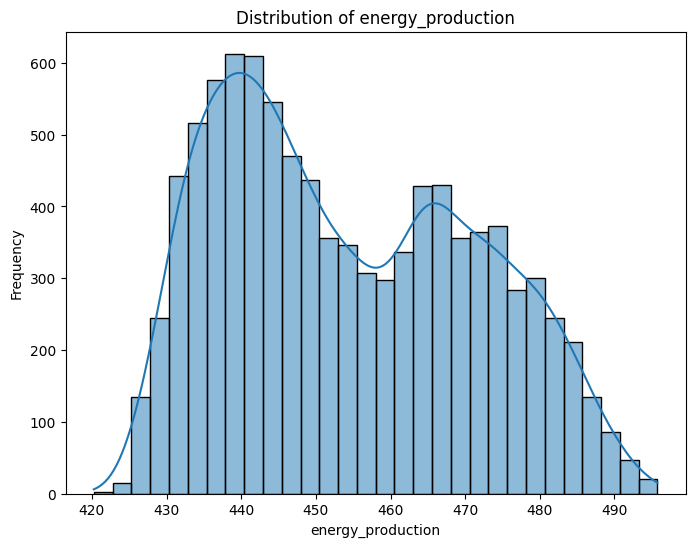

In [ ]:
# Visualize the distribution of the target variable 'Energy Production'
plt.figure(figsize=(8, 6))
sns.histplot(Data['energy_production'], bins=30, kde=True)
plt.xlabel('energy_production')
plt.ylabel('Frequency')
plt.title('Distribution of energy_production')
plt.show()

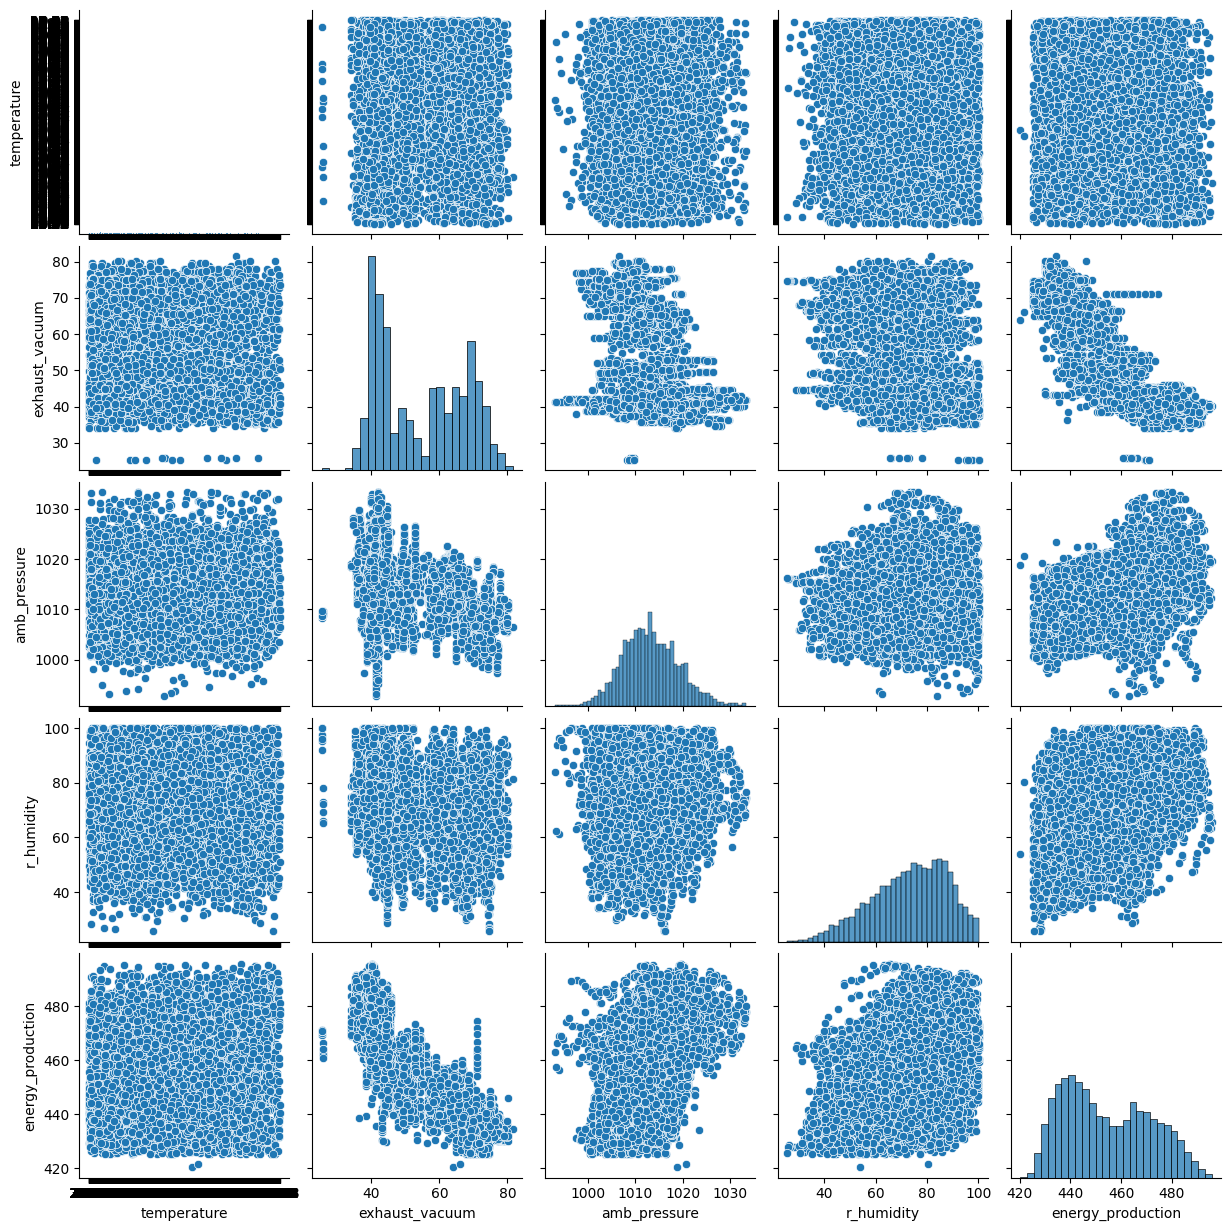

In [ ]:
# Visualize the relationships between variables using pairplots
sns.pairplot(Data, vars=[ 'temperature',	'exhaust_vacuum',	'amb_pressure',	'r_humidity',	'energy_production'])
plt.show()

<ipython-input-99-142ae87f8283>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


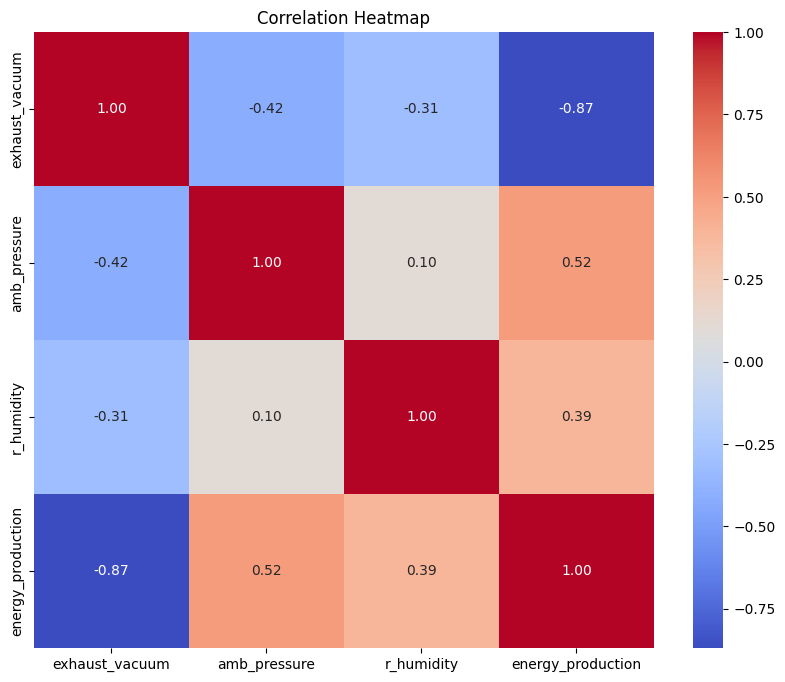

In [ ]:
# Correlation heatmap to visualize the correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

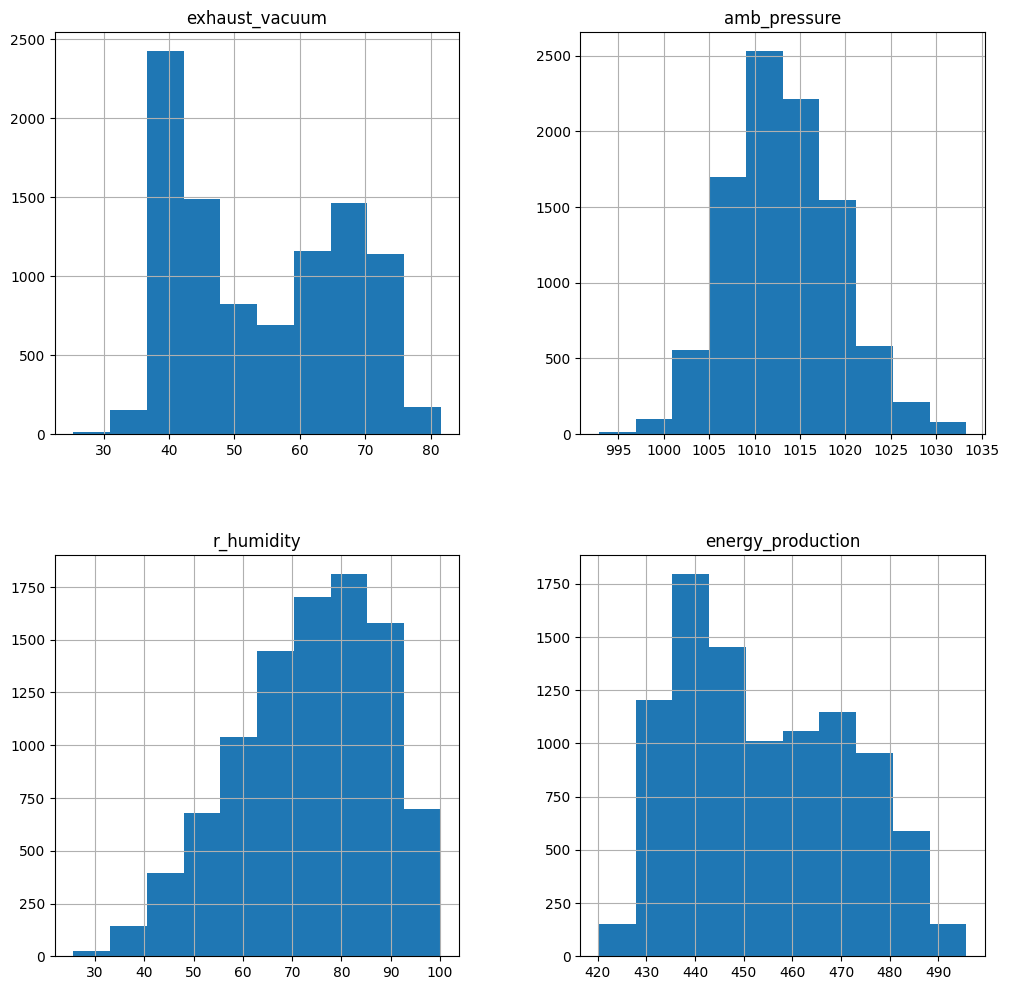

In [ ]:
Data.hist(figsize=(12,12))
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Violin Plot: temperature vs. energy_production')

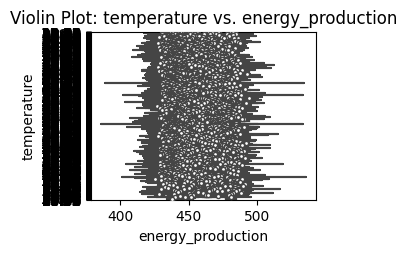

In [ ]:
plt.subplot(2, 2, 1)
sns.violinplot(x='energy_production', y='temperature', data=Data)
plt.xlabel('energy_production')
plt.ylabel('temperature')
plt.title('Violin Plot: temperature vs. energy_production')

Text(0.5, 1.0, 'Violin Plot: exhaust_vacuum\tvs. energy_production')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


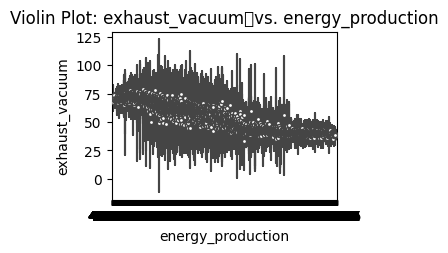

In [ ]:
plt.subplot(2, 2, 2)
sns.violinplot(x='energy_production', y='exhaust_vacuum', data=Data)
plt.xlabel('energy_production')
plt.ylabel('exhaust_vacuum')
plt.title('Violin Plot: exhaust_vacuum	vs. energy_production')






Text(0.5, 1.0, 'Box Plot: amb_pressure vs. energy_production')

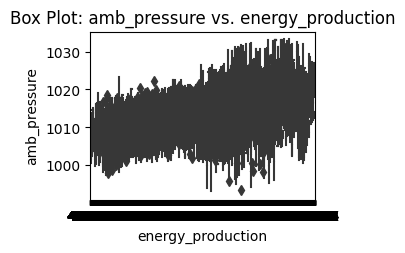

In [ ]:
plt.subplot(2, 2, 3)
sns.boxplot(x='energy_production', y='amb_pressure', data=Data, palette='coolwarm')
plt.xlabel('energy_production')
plt.ylabel('amb_pressure')
plt.title('Box Plot: amb_pressure vs. energy_production')

Text(0.5, 1.0, 'Box Plot: r_humidity vs. energy_production')

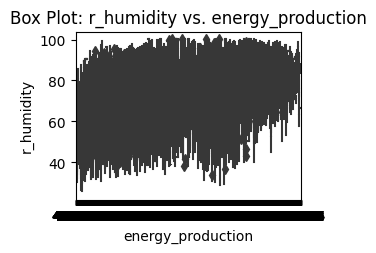

In [ ]:
plt.subplot(2, 2, 4)
sns.boxplot(x='energy_production', y='r_humidity', data=Data, palette='coolwarm')
plt.xlabel('energy_production')
plt.ylabel('r_humidity')
plt.title('Box Plot: r_humidity vs. energy_production')

In [ ]:
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [ ]:
!pip install pandas-profiling[notebook]

In [ ]:
import pandas as pd
import pandas_profiling
import warnings


In [ ]:
report = pandas_profiling.ProfileReport(Data, explorative=True)

In [ ]:
report.to_file("auto_eda_report.html")


/usr/local/lib/python3.10/dist-packages/multimethod/__init__.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Display the report as a collapsible iframe
report.to_notebook_iframe()

In [ ]:
# Install required libraries (only required once in the Colab environment)
!pip install numpy pandas scipy

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

In [ ]:
numerical_columns = Data.select_dtypes(include='number').columns


In [ ]:
Data_copy = Data.copy()

In [ ]:
# Calculate Z-scores for each numerical variable in the DataFrame copy
Data_copy[numerical_columns] = Data_copy[numerical_columns].apply(zscore)

In [ ]:
print(Data_copy.head())

  temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0        9.59       -1.240254      0.635148   -0.906085           1.582568
1       12.04       -0.942279      1.091361    1.460630           0.647023
2       13.87       -0.726287      1.882578    0.571999           0.654066
3       13.72        0.000519      0.783291    0.393315           0.746212
4       15.14       -0.366826      1.774838    0.113992           0.542551


In [ ]:
!pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         26 mins 34 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    18 hours and 2 minutes
H2O_cluster_name:           H2O_from_python_unknownUser_38yit1
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.032 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
# Assuming you have loaded your data into a pandas DataFrame called 'df'
# Convert the pandas DataFrame to an H2O Frame
h2o_Data = h2o.H2OFrame(Data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Replace 'target_column_name' with the name of your target variable
x = h2o_Data.columns[:-1]
y = 'energy_production'

In [ ]:
# Train AutoML model
aml = H2OAutoML(max_models=10, seed=42)
aml.train(x=x, y=y, training_frame=h2o_Data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_2_20230823_102137


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  8/10
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      2/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 3.1981173992467045
RMSE: 1.788328101676732
MAE: 1.2738457765824576
RMSLE: 0.0039542824148114985
Mean Residual Deviance: 3.1981173992467045
R^2: 0.9889833971048791
Null degrees of freedom: 9526
Residual degrees of freedom: 9518
Null deviance: 2765686.006110878
Residual deviance: 30468.464462623353
AIC: 38132.18607191952

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 9.71885222744144
RMSE: 3.1175073740797212
MAE: 2.207522579278402
RMSLE: 0.006848422519920628
Mean Residual Deviance: 9.71885222744144
R^2: 0.9665213241971811
Null degrees of freedom: 9526
Residual degrees of freedom: 9518
Null deviance: 2766281.9098979747
Residual deviance: 92591.5051708346
AIC: 48721.49615001725

Cross-Validation Metrics Summary: 
                        mean        sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     2.20785     0.0559008    2.20432       2.16464       2.14232       2.26041       2.26754
mean_residual_deviance  9.724       1.27931      10.4937       8.82011       7.96131       11.0122       10.3326
mse                     9.724       1.27931      10.4937       8.82011       7.96131       11.0122       10.3326
null_deviance           553256      33728.1      563255        536288        572836        589961        503943
r2                      0.966471    0.00424329   0.963477      0.968481      0.97305       0.963887      0.963462
residual_deviance       18515.7     2455.36      20557.2       16881.7       15429         21297.7       18412.7
rmse                    3.11275     0.208505     3.2394        2.96987       2.82158       3.31847       3.21444
rmsle                   0.00683758  0.000462653  0.00711346    0.00650641    0.00620445    0.00730947    0.0070541

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
# View the leaderboard
lb = aml.leaderboard
print(lb)

model_id                                                    rmse       mse      mae       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20230823_102137     3.11751   9.71885  2.20752  0.00684842                   9.71885
StackedEnsemble_BestOfFamily_1_AutoML_2_20230823_102137  3.18369  10.1359   2.273    0.0069936                   10.1359
GBM_4_AutoML_2_20230823_102137                           3.24176  10.509    2.32287  0.0071149                   10.509
GBM_3_AutoML_2_20230823_102137                           3.2511   10.5697   2.33657  0.00713571                  10.5697
XGBoost_3_AutoML_2_20230823_102137                       3.28965  10.8218   2.36339  0.00722303                  10.8218
XGBoost_2_AutoML_2_20230823_102137                       3.3038   10.9151   2.36932  0.00725228                  10.9151
XGBoost_1_AutoML_2_20230823_102137                       3.31107  10.9632   2.37317  0.00727669                  10.9632
GBM_2_AutoML_2_20230823_102137 

In [ ]:
# Get the best model
best_model = aml.leader
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_2_20230823_102137


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  8/10
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      2/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 3.1981173992467045
RMSE: 1.788328101676732
MAE: 1.2738457765824576
RMSLE: 0.0039542824148114985
Mean Residual Deviance: 3.1981173992467045
R^2: 0.9889833971048791
Null degrees of freedom: 9526
Resi

In [ ]:
performance = best_model.model_performance(h2o_Data)
print(performance)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 3.1981173992467045
RMSE: 1.788328101676732
MAE: 1.2738457765824576
RMSLE: 0.0039542824148114985
Mean Residual Deviance: 3.1981173992467045
R^2: 0.9889833971048791
Null degrees of freedom: 9526
Residual degrees of freedom: 9518
Null deviance: 2765686.006110878
Residual deviance: 30468.464462623353
AIC: 38132.18607191952


In [ ]:
# Feature importances (if applicable for the best model)
if 'feature_importances' in best_model.__dict__:
    best_model.varimp_plot()

In [ ]:
# Partial Dependence Plots (if applicable for the best model)
if 'partial_plot' in best_model.__dict__:
    best_model.partial_plot(data=h2o_Data, cols=x)

In [ ]:
# SHAP summary plot (if applicable for the best model)
if 'shap_summary_plot' in best_model.__dict__:
    best_model.shap_summary_plot(h2o_Data)

# Train and Test


In [ ]:
# Replace 'target_column_name' with the name of your target variable
target_column_name = 'energy_production'

In [ ]:
# Separate features (X) and target (y)
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Display the shapes of the train and test sets
print("Train set shape: ", X_train.shape, y_train.shape)
print("Test set shape: ", X_test.shape, y_test.shape)

Train set shape:  (7621, 4) (7621,)
Test set shape:  (1906, 4) (1906,)


# Linear regression model

In [ ]:
# Initialize the linear regression model
model = LinearRegression()

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Display the evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2): ", r2)

Mean Squared Error (MSE):  20.8782388579529
R-squared (R2):  0.9283024922947181


# RandomForestRegressor

In [ ]:
# Separate features (X) and target (y)
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Display the evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2): ", r2)

Mean Squared Error (MSE):  11.153135162366208
R-squared (R2):  0.9616992601874942


### GradientBoostingRegressor

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Display the evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2): ", r2)

Mean Squared Error (MSE):  15.6930147861896
R-squared (R2):  0.9461089579342876


In [ ]:
!pip install numpy pandas tensorflow scikit-learn

In [ ]:
# Drop any rows with missing values
Data.dropna(inplace=True)


<ipython-input-153-64891547f023>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.dropna(inplace=True)


In [ ]:
# Split the data into features (X) and target (y)
target_column_name = 'energy_production'
X = Data.drop(target_column_name, axis=1)
y = Data[target_column_name]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#output layer
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               640       
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
215/215 [==============================] - 2s 3ms/step - loss: 144979.9688 - val_loss: 29514.4531
Epoch 2/50
215/215 [==============================] - 1s 4ms/step - loss: 15866.7217 - val_loss: 6575.9502
Epoch 3/50
215/215 [==============================] - 1s 3ms/step - loss: 6433.2524 - val_loss: 1838.8606
Epoch 4/50
215/215 [==============================] - 1s 3ms/step - loss: 3832.2158 - val_loss: 772.4390
Epoch 5/50
215/215 [==============================] - 1s 3ms/step - loss: 3143.6382 - val_loss: 400.8141
Epoch 6/50
215/215 [==============================] - 1s 4ms/step - loss: 2823.5132 - val_loss: 273.8771
Epoch 7/50
215/215 [==============================] - 1s 3ms/step - loss: 2576.8953 - val_loss: 150.8213
Epoch 8/50
215/215 [==============================] - 1s 3ms/step - loss: 2541.3689 - val_loss: 151.2927
Epoch 9/50
215/215 [==============================] - 0s 2ms/step - loss: 2483.7771 - val_loss: 77.7874
Epoch 10/50
215/215 [============================

In [ ]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9461089579342876


In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3.9614409987010535


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
215/215 [==============================] - 1s 4ms/step - loss: 2070.4192 - val_loss: 34.1365
Epoch 2/100
215/215 [==============================] - 1s 5ms/step - loss: 2048.3525 - val_loss: 45.5457
Epoch 3/100
215/215 [==============================] - 2s 7ms/step - loss: 2052.2957 - val_loss: 28.2747
Epoch 4/100
215/215 [==============================] - 1s 5ms/step - loss: 2010.4934 - val_loss: 136.7540
Epoch 5/100
215/215 [==============================] - 1s 5ms/step - loss: 2038.4911 - val_loss: 56.0972
Epoch 6/100
215/215 [==============================] - 1s 3ms/step - loss: 2036.8748 - val_loss: 51.1707
Epoch 7/100
215/215 [==============================] - 0s 2ms/step - loss: 2068.4270 - val_loss: 70.0913
Epoch 8/100
215/215 [==============================] - 0s 2ms/step - loss: 2071.2249 - val_loss: 58.6970
Epoch 9/100
215/215 [==============================] - 0s 2ms/step - loss: 2025.4445 - val_loss: 115.4657
Epoch 10/100
215/215 [==============================]

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)


Epoch 1/100
215/215 [==============================] - 1s 4ms/step - loss: 2084.3076 - val_loss: 32.8719
Epoch 2/100
215/215 [==============================] - 1s 4ms/step - loss: 2065.5732 - val_loss: 41.6133
Epoch 3/100
215/215 [==============================] - 1s 4ms/step - loss: 2099.3633 - val_loss: 47.9614
Epoch 4/100
215/215 [==============================] - 1s 4ms/step - loss: 2092.6946 - val_loss: 42.9588
Epoch 5/100
215/215 [==============================] - 1s 4ms/step - loss: 2069.9766 - val_loss: 29.5432
Epoch 6/100
215/215 [==============================] - 1s 4ms/step - loss: 2118.8706 - val_loss: 35.9550
Epoch 7/100
215/215 [==============================] - 1s 3ms/step - loss: 2059.2793 - val_loss: 47.3671
Epoch 8/100
215/215 [==============================] - 2s 8ms/step - loss: 2076.6929 - val_loss: 76.9396
Epoch 9/100
215/215 [==============================] - 1s 7ms/step - loss: 2088.8352 - val_loss: 37.6107
Epoch 10/100
215/215 [==============================] -

In [ ]:
# Evaluate on test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

60/60 [==============================] - 0s 1ms/step
Mean Squared Error: 47.859413226768524


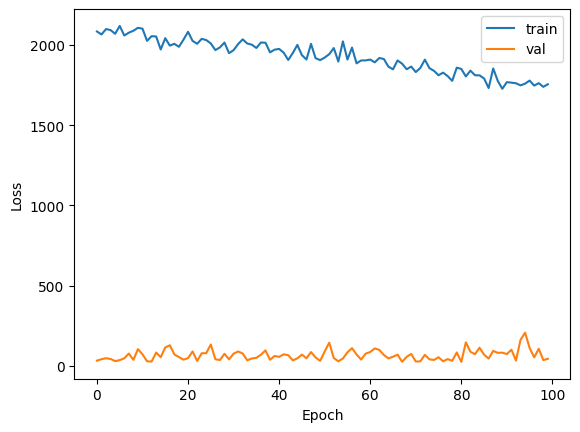

In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import pickle
import os
from pickle import dump
from pickle import load

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 95.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 33.5 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


In [ ]:
file_path="Stackmodel.pkl"

In [ ]:
with open(file_path,"wb") as f:
  pickle.dump(stacking_regressor,f)

In [ ]:
print("Stackmodel saved as pickle file")

Stackmodel saved as pickle file
